In [1]:
from google.colab import files
uploaded = files.upload()


Saving ER Wait Time Dataset.csv to ER Wait Time Dataset.csv


In [2]:
import pandas as pd

df = pd.read_csv("ER Wait Time Dataset.csv")
df.head()


,Visit ID,Patient ID,Hospital ID,Hospital Name,Region,Visit Date,Day of Week,Season,Time of Day,Urgency Level,Nurse-to-Patient Ratio,Specialist Availability,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Outcome,Patient Satisfaction
0,HOSP-1-20240210-0001,PAT-00001,HOSP-1,Springfield General Hospital,Urban,2024-02-10 20:20:56,Saturday,Winter,Late Morning,Medium,4,3,92,17,22,66,105,Discharged,1
1,HOSP-3-20241128-0001,PAT-00002,HOSP-3,Northside Community Hospital,Rural,2024-11-28 02:07:47,Thursday,Fall,Evening,Medium,4,0,38,9,30,30,69,Discharged,3
2,HOSP-3-20240930-0002,PAT-00003,HOSP-3,Northside Community Hospital,Rural,2024-09-30 04:02:28,Monday,Fall,Evening,Low,5,1,38,38,40,125,203,Discharged,1
3,HOSP-2-20240227-0001,PAT-00004,HOSP-2,Riverside Medical Center,Urban,2024-02-27 00:31:13,Tuesday,Winter,Evening,High,4,5,94,8,16,64,88,Discharged,2
4,HOSP-1-20240306-0002,PAT-00005,HOSP-1,Springfield General Hospital,Urban,2024-03-06 16:52:26,Wednesday,Spring,Afternoon,Low,4,8,74,26,29,63,118,Discharged,1


In [3]:
df.columns


Index(['Visit ID', 'Patient ID', 'Hospital ID', 'Hospital Name', 'Region',
       'Visit Date', 'Day of Week', 'Season', 'Time of Day', 'Urgency Level',
       'Nurse-to-Patient Ratio', 'Specialist Availability',
       'Facility Size (Beds)', 'Time to Registration (min)',
       'Time to Triage (min)', 'Time to Medical Professional (min)',
       'Total Wait Time (min)', 'Patient Outcome', 'Patient Satisfaction'],
      dtype='object')

In [12]:
# Clean numeric columns
df["Total Wait Time (min)"] = pd.to_numeric(df["Total Wait Time (min)"], errors="coerce")
df["Patient Satisfaction"] = pd.to_numeric(df["Patient Satisfaction"], errors="coerce")
df["Nurse-to-Patient Ratio"] = pd.to_numeric(df["Nurse-to-Patient Ratio"], errors="coerce")

df = df.dropna(subset=[
    "Total Wait Time (min)",
    "Urgency Level",
    "Patient Satisfaction",
    "Nurse-to-Patient Ratio",
    "Time of Day"
])

plt.rcParams["figure.dpi"] = 120

CHART 1 — Wait Time by Urgency Level

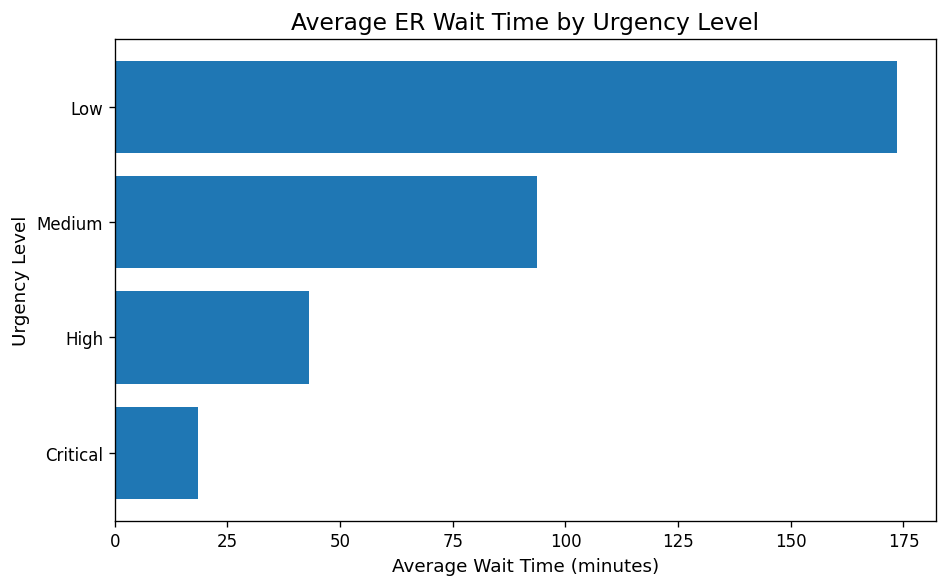

In [13]:
avg_wait_urgency = (
    df.groupby("Urgency Level")["Total Wait Time (min)"]
    .mean()
    .sort_values()
)

plt.figure(figsize=(8,5))
plt.barh(avg_wait_urgency.index, avg_wait_urgency.values)

plt.title("Average ER Wait Time by Urgency Level")
plt.xlabel("Average Wait Time (minutes)")
plt.ylabel("Urgency Level")

plt.grid(False)
plt.tight_layout()
plt.show()


CHART 2 — Wait Time vs Satisfaction

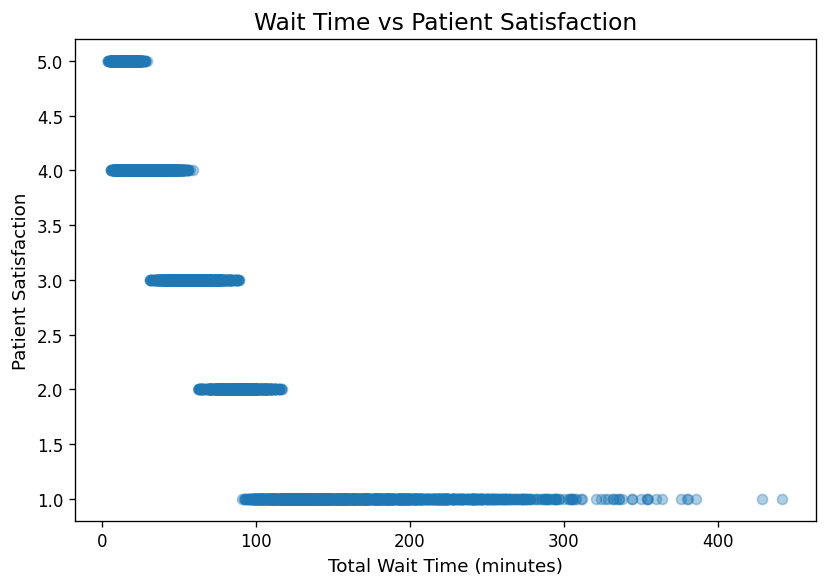

In [14]:
plt.figure(figsize=(7,5))

plt.scatter(
    df["Total Wait Time (min)"],
    df["Patient Satisfaction"],
    alpha=0.35
)

plt.title("Wait Time vs Patient Satisfaction")
plt.xlabel("Total Wait Time (minutes)")
plt.ylabel("Patient Satisfaction")

plt.grid(False)
plt.tight_layout()
plt.show()


CHART 3 — Staffing Ratio vs Wait Time

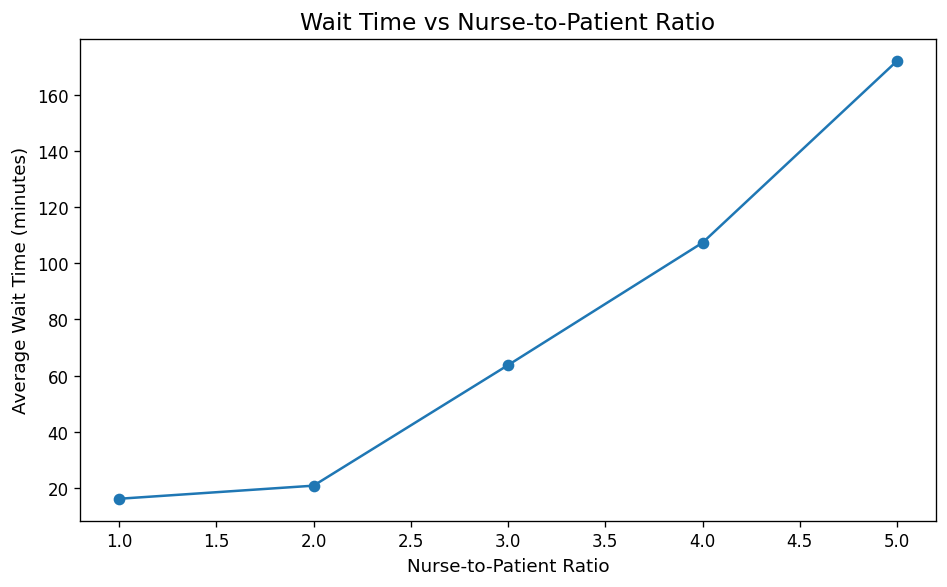

In [15]:
avg_wait_staff = (
    df.groupby("Nurse-to-Patient Ratio")["Total Wait Time (min)"]
    .mean()
)

plt.figure(figsize=(8,5))

plt.plot(
    avg_wait_staff.index,
    avg_wait_staff.values,
    marker="o"
)

plt.title("Wait Time vs Nurse-to-Patient Ratio")
plt.xlabel("Nurse-to-Patient Ratio")
plt.ylabel("Average Wait Time (minutes)")

plt.grid(False)
plt.tight_layout()
plt.show()


 CHART 4 — Boxplot by Time of Day

/tmp/ipython-input-2993323195.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=order)


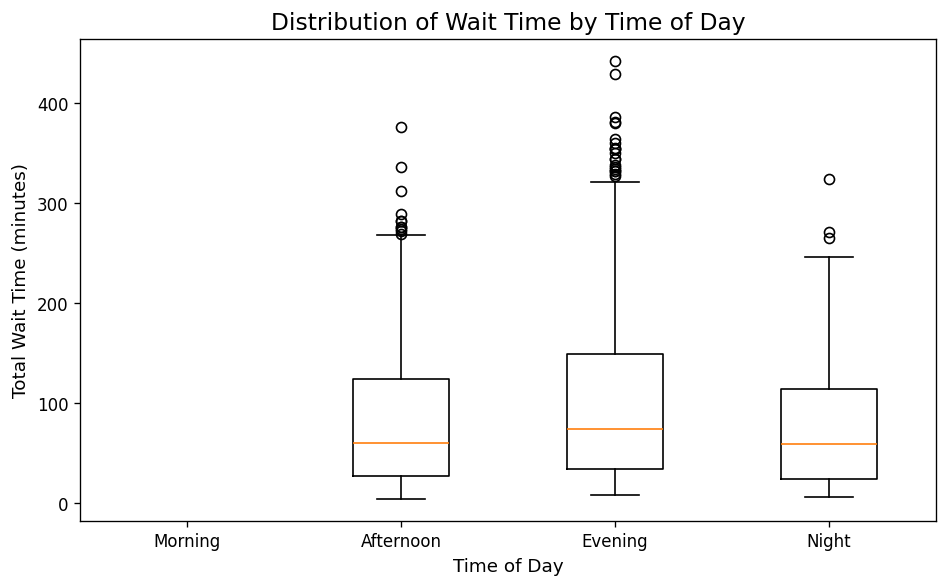

In [16]:
order = ["Morning","Afternoon","Evening","Night"]

data = [
    df[df["Time of Day"] == t]["Total Wait Time (min)"]
    for t in order
]

plt.figure(figsize=(8,5))
plt.boxplot(data, labels=order)

plt.title("Distribution of Wait Time by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Total Wait Time (minutes)")

plt.grid(False)
plt.tight_layout()
plt.show()
